# subclustering macrophages
## essentially this continues on from 2024-11-12_Nikita_Clean_Clustering.jpynb

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
#Read in full annotated object
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [4]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [5]:
# Set colours for MyeloidAPC_Subsets plot:
data.uns["MyeloidAPC_Subsets_colors"] = ['#d62728', '#279e68', '#e377c2', '#aa40fc', '#8c564b', '#5fa6e6']  

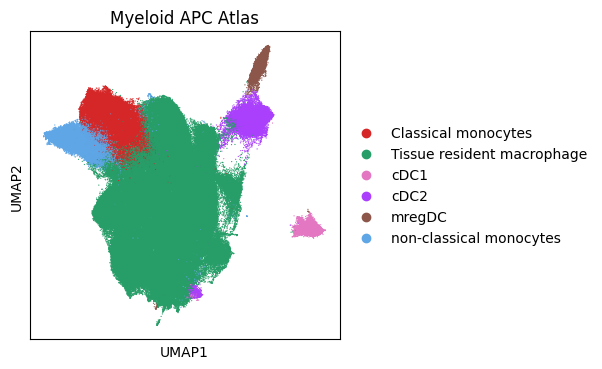

In [6]:
#visualise umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="MyeloidAPC_Subsets", 
               size=3,
               title="Myeloid APC Atlas")

In [7]:
data.obs["MyeloidAPC_Subsets_Mac"] = data.obs["MyeloidAPC_Subsets"].map(
    {
        "Classical monocytes": "Classical monocytes",
        "Tissue resident macrophage": "Macrophages",
        "cDC1": "cDC1",
        "cDC2": "cDC2",
        "mregDC": "mregDC",
        "non-classical monocytes": "non-classical monocytes",
    }
)

In [8]:
# Set colours for MyeloidAPC_Subsets plot:
data.uns["MyeloidAPC_Subsets_Mac_colors"] = ['#d62728', '#279e68', '#e377c2', '#aa40fc', '#8c564b', '#5fa6e6']  

In [9]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects/Mac_Clustering_Exports')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects/Mac_Clustering_Exports'

In [27]:
#only run for UMAPs
sc.set_figure_params(dpi=80, dpi_save=700, vector_friendly=True, format='svg')

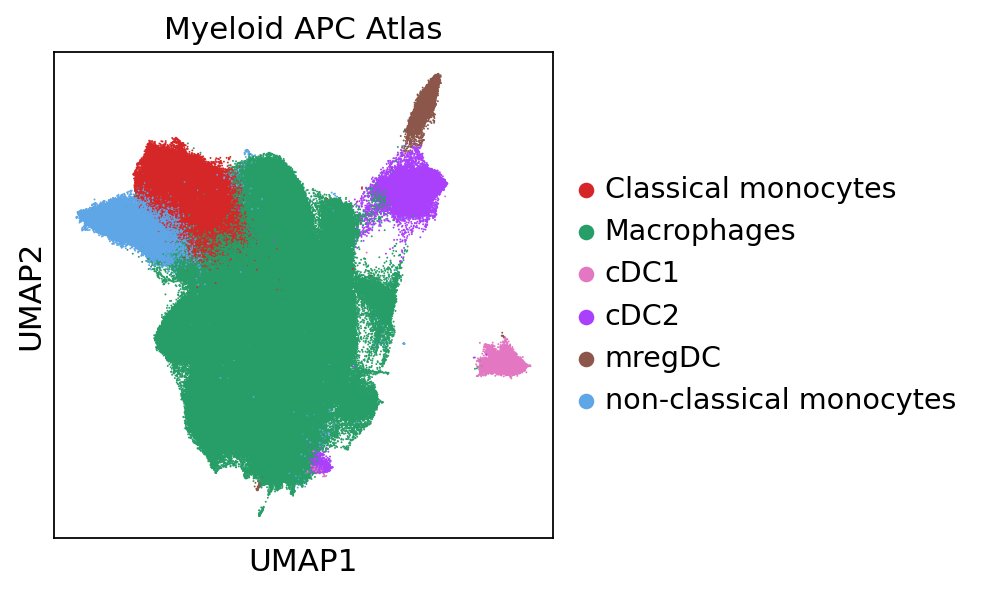

In [28]:
#visualise umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="MyeloidAPC_Subsets_Mac", 
               size=3,
               save="_Clustering_simple.svg",
               title="Myeloid APC Atlas")

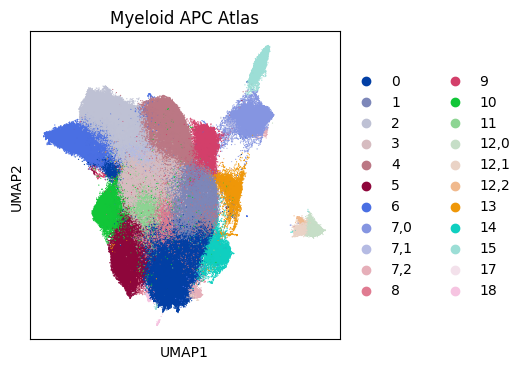

In [11]:
#visualise umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="clean-subcluster-v2", 
               size=3,
               title="Myeloid APC Atlas")

In [12]:
#rename clear clusters
data.obs["prelim_clusters"] = data.obs["clean-subcluster-v2"].map(
    {
        "0": "0",
        "1": "1",
        "2": "Classical monocytes",
        "3": "3",
        "4": "4",
        "5": "5",
        "6": "non-classical monocytes",
        "7,0": "cDC2",
        "7,1": "7",
        "7,2": "cDC2",
        "8": "8",
        "9": "9",
        "10": "10",
        "11": "11",
        "12,0": "cDC1",
        "12,1": "cDC1",
        "12,2": "cDC1",
        "13": "13",
        "14": "14",
        "15": "mregDC",
        "17": "17",
        "18": "18"
    }
)

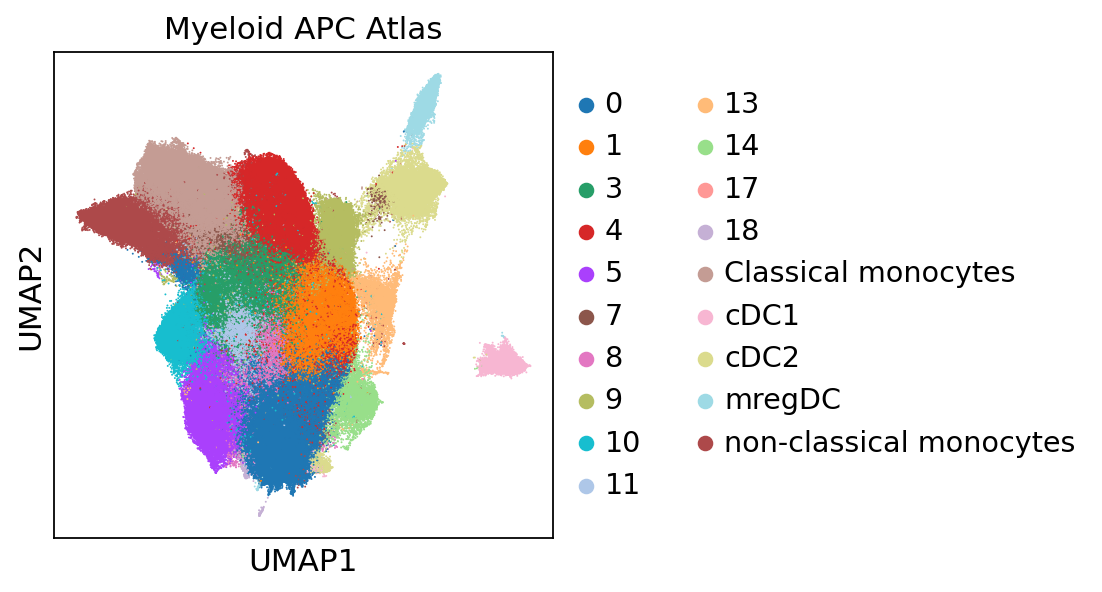

In [29]:
#visualise umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="prelim_clusters", 
               size=3,
               save="_Mac_subclusters.svg",
               title="Myeloid APC Atlas")

In [14]:
# check annots
annots = data.obs['MyeloidAPC_Subsets'].value_counts()
print(annots)

MyeloidAPC_Subsets
Tissue resident macrophage    381441
Classical monocytes            57086
non-classical monocytes        29255
cDC2                           17391
cDC1                            6730
mregDC                          6120
Name: count, dtype: int64


In [15]:
# check annots
annots = data.obs['prelim_clusters'].value_counts()
print(annots)

prelim_clusters
0                          85307
1                          67085
Classical monocytes        57086
3                          55287
4                          44122
5                          39558
non-classical monocytes    29255
8                          21362
9                          20317
cDC2                       17391
10                         15628
11                         11130
7                           8264
cDC1                        6730
13                          6564
14                          6456
mregDC                      6120
17                           205
18                           156
Name: count, dtype: int64


# breakdown by metadata

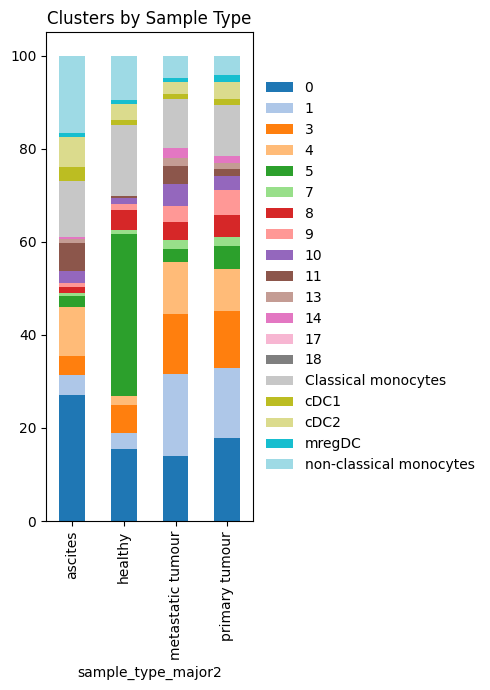

In [57]:
pd.crosstab(data.obs["sample_type_major2"], data.obs["prelim_clusters"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(5,7), colormap="tab20")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("Clusters by Sample Type")
plt.tight_layout()  
plt.savefig("barplot_Atlas_clusters_sample_type.pdf", format="pdf", bbox_inches="tight")
plt.show()

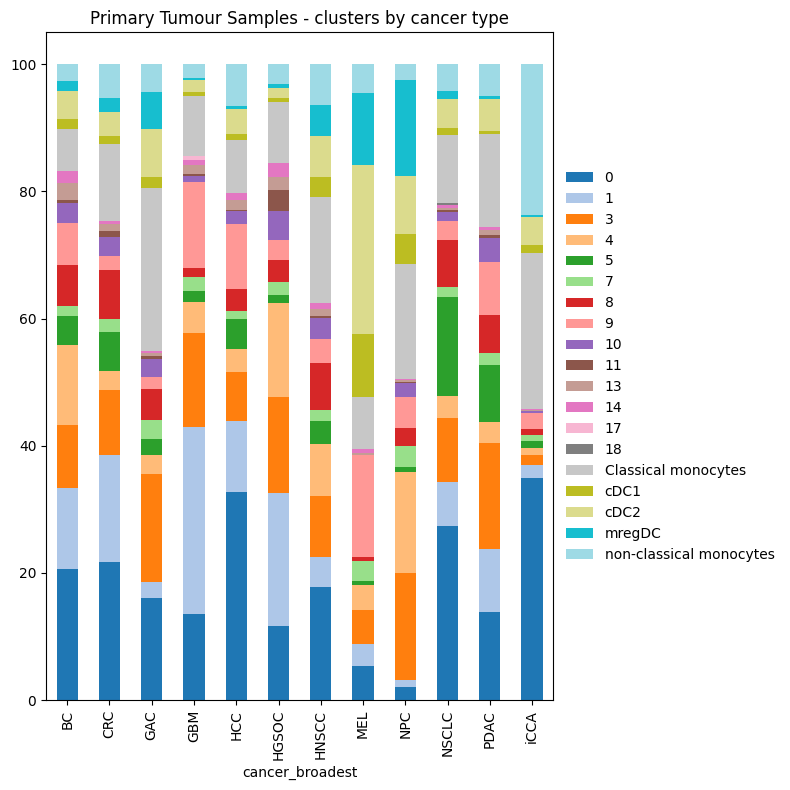

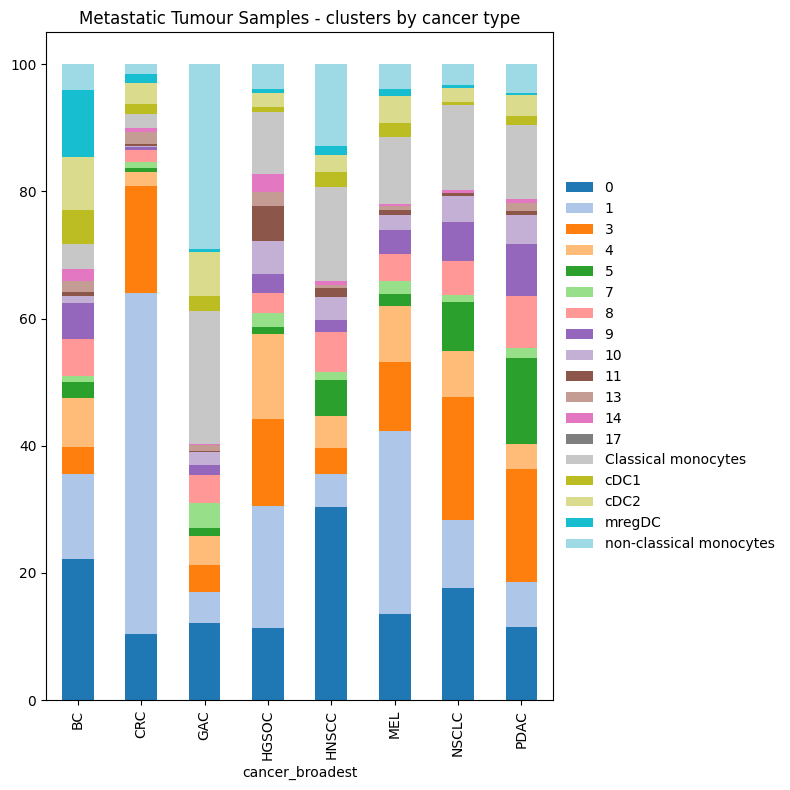

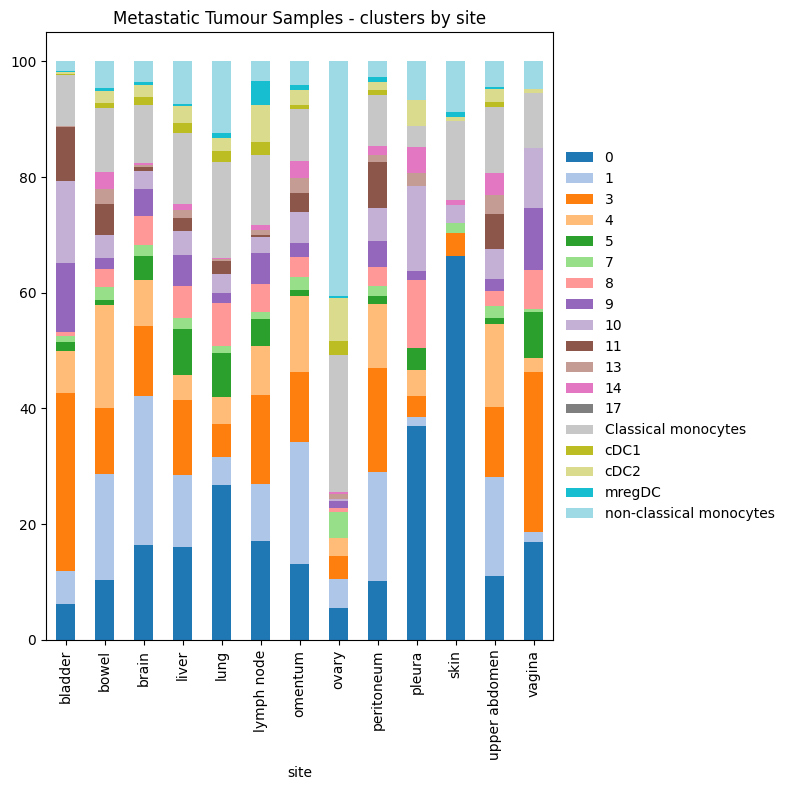

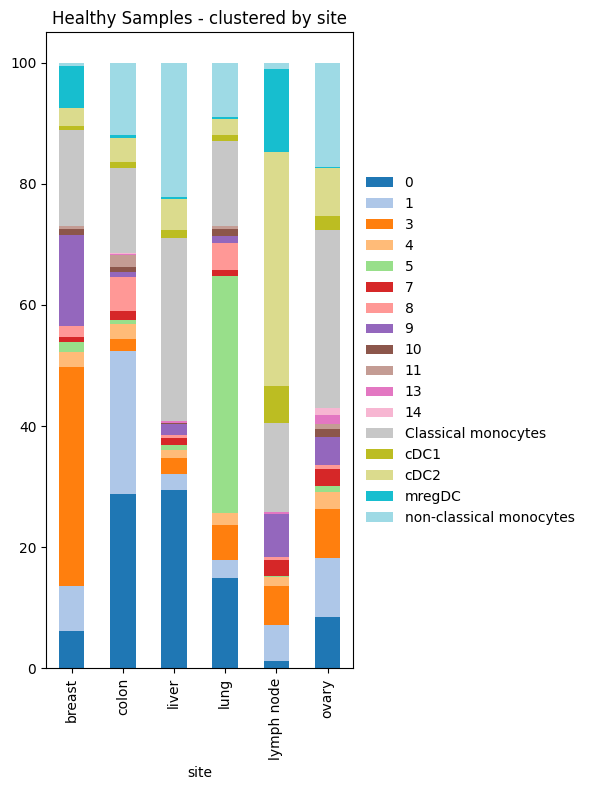

In [58]:
# subset to each sample type, then breakdown by cancer type/ site
data_P = data[data.obs["sample_type_major2"] == "primary tumour"]
data_M = data[data.obs["sample_type_major2"] == "metastatic tumour"]
data_H = data[data.obs["sample_type_major2"] == "healthy"]

pd.crosstab(data_P.obs["cancer_broadest"], data_P.obs["prelim_clusters"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(8,8), colormap="tab20")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("Primary Tumour Samples - clusters by cancer type")
plt.tight_layout()  
plt.savefig("barplot_Atlas_clusters-primary.pdf", format="pdf", bbox_inches="tight")
plt.show()

pd.crosstab(data_M.obs["cancer_broadest"], data_M.obs["prelim_clusters"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(8,8), colormap="tab20")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("Metastatic Tumour Samples - clusters by cancer type")
plt.tight_layout()  
plt.savefig("barplot_Atlas_clusters-metastatic_sample-type.pdf", format="pdf", bbox_inches="tight")
plt.show()

pd.crosstab(data_M.obs["site"], data_M.obs["prelim_clusters"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(8,8), colormap="tab20")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("Metastatic Tumour Samples - clusters by site")
plt.tight_layout()  
plt.savefig("barplot_Atlas_clusters-metastatic_site.pdf", format="pdf", bbox_inches="tight")
plt.show()

pd.crosstab(data_H.obs["site"], data_H.obs["prelim_clusters"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,8), colormap="tab20")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.title("Healthy Samples - clustered by site")
plt.tight_layout()  
plt.savefig("barplot_Atlas_clusters-healthy_site.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Calculate DEG genes

In [18]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data, groupby="prelim_clusters", method="wilcoxon")

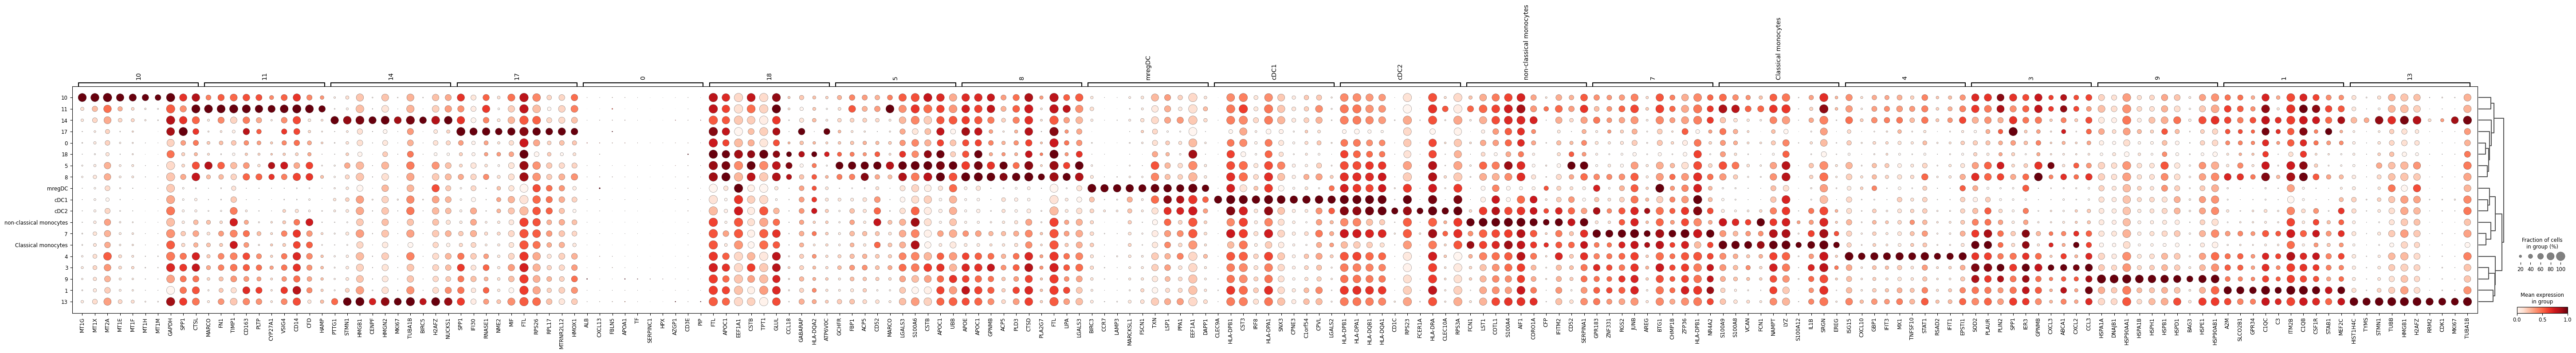

In [19]:
#visualise the top 10 DEG genes for each cluster
sc.pl.rank_genes_groups_dotplot(
    data, groupby="prelim_clusters", standard_scale="var", n_genes=10, min_logfoldchange=1, save="Atlas_10_DEGS.svg"
)

# Generate heat map of marker genes

In [25]:
gene_sets = {
    "DC": ["HLA-DRA","ITGAM","ITGAX"],
    "cDC1": ["CLEC9A", "XCR1","BATF3","IRF8"],
    "cDC2/DC3": ["CD1C", "FCER1A"],
    "cDC2": ["CLEC10A","CD5","IRF4"],
    "DC3": ["CD14","CD163","CSF2RA","CSF2RB"],
    "mregDC": ["LAMP3","CD274","CCR7"],
    "Monocytes": ["CD14", "FCGR3A","CD163","LYZ","S100A8","S100A9","CCR2","SPN","ITGA4"],
    "Macrophages": ["FCGR1A", "CD68","CSF1R","TREM2","SPP1","CX3CR1","AIF1","NT5E","ITGAV","ENTPD1","CD36","VTCN1","C1QA","C1QB","C1QC","BTK","C3AR1","CCR1","MERTK"],
    "Proliferating": ["MKI67"]
}

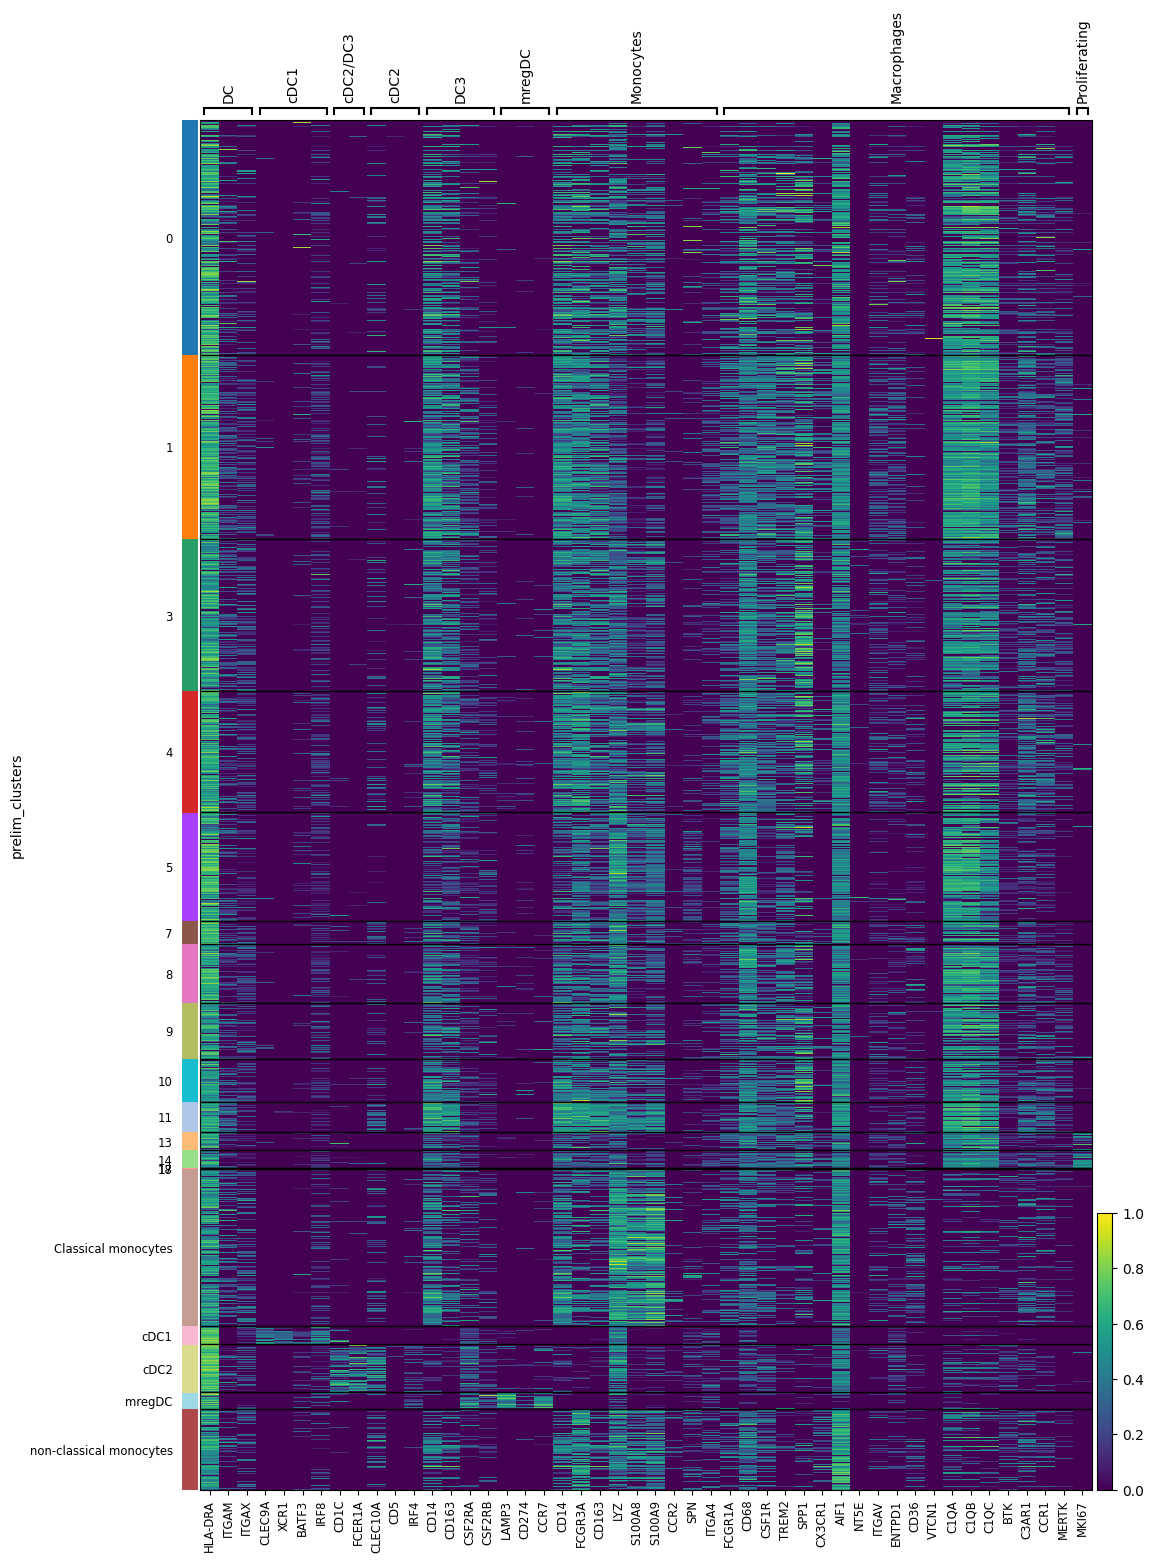

In [26]:
sc.pl.heatmap(data, gene_sets, groupby="prelim_clusters", standard_scale="var", figsize=(12,18), save="_Markers_dotplot.svg") 